## Credits

EasyGeppy is based on Geppy project (https://github.com/ShuhuaGao/geppy)

This example is based on the Geppy example: https://github.com/ShuhuaGao/geppy/blob/master/examples/sr/numerical_expression_inference-ENC.ipynb

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

from easy_geppy import EasyGeppy

## Synthetic dataset

In [2]:
def f(x):
    """ Ground truth function"""
    return -2 * x ** 2 + 11 * x + 13

### Generate samples

In [3]:
n_cases = 100
X = np.random.uniform(-10, 10, size=n_cases)   # random numbers in range [-10, 10)
Y = f(X) + (np.random.normal(size=n_cases)*10) # Gaussian noise

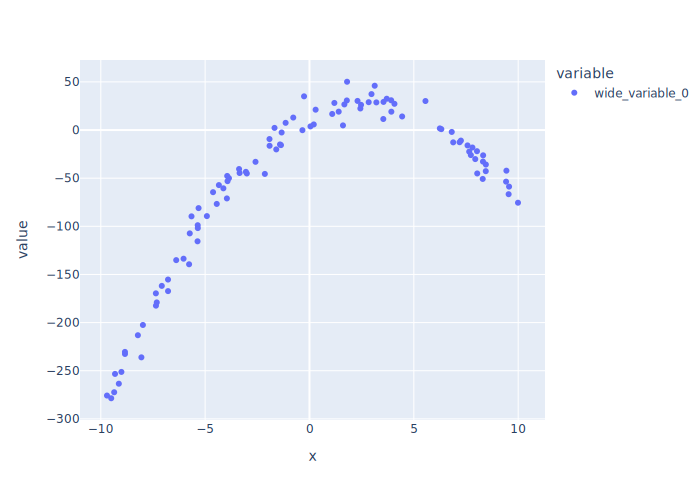

In [4]:
fig = px.scatter(x=X, y=[Y])
fig.show('svg')

### Increased noise observations

In [5]:
df = pd.DataFrame(X, columns=['x'])
df['y'] = Y
df['y1'] = Y+(np.random.normal(size=n_cases)*5)
df['y2'] = Y+(np.random.normal(size=n_cases)*10)
df['y3'] = Y+(np.random.normal(size=n_cases)*25)
df['y4'] = Y+(np.random.normal(size=n_cases)*50)
df

,x,y,y1,y2,y3,y4
0,1.604939,4.809281,2.741134,4.693335,3.185793,-131.973785
1,-1.365814,-15.669463,-18.241109,-9.341193,-21.341389,-78.687996
2,5.557423,30.123185,30.853157,24.241757,66.233854,70.430088
3,2.971587,37.314142,35.659354,30.455177,12.745712,55.549218
4,8.037806,-45.093919,-44.088831,-40.191495,-89.885644,-102.569150
...,...,...,...,...,...,...
95,-1.911558,-16.364691,-13.702425,-18.970313,-5.882917,-59.513440
96,2.438468,22.382039,24.922354,17.973541,2.207494,46.442033
97,9.542923,-66.645873,-64.231345,-40.829297,-82.387665,-81.787584
98,7.573717,-15.981069,-32.686730,-7.443209,-17.581667,23.210885


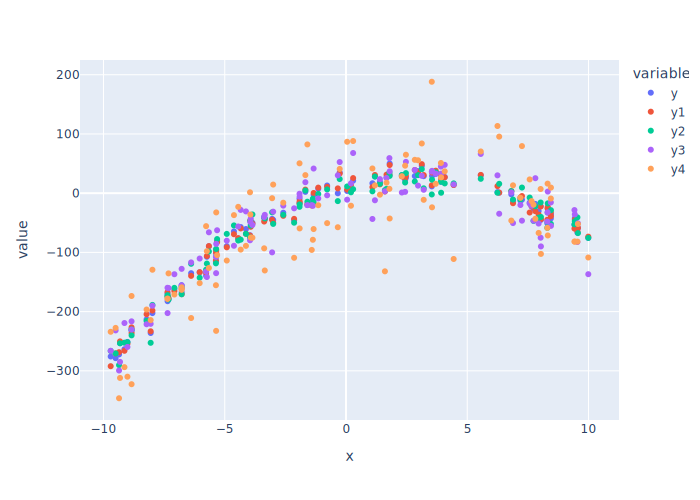

In [6]:
fig = px.scatter(df,x='x',y=['y','y1','y2','y3','y4'])
fig.show('svg')

## Define inputs and outputs

### Choose one output column

In [7]:
y_column = 'y4' # y4 is the most noisy so we're taking it

### You may choose many columns as input (remember to drop the y_column)

In [8]:
x_inputs = list(df.drop(y_column,axis=1).columns)
x_inputs

['x', 'y', 'y1', 'y2', 'y3']

### But we will use only the 'x' column from the dataset for this example

In [9]:
x_inputs = ['x']

## Create EasyGeppy instance and Initialize

In [10]:
egp = EasyGeppy(df,
                 x_columns=x_inputs,
                 y_column=y_column)

### Set default initialization

In [11]:
egp.default_initialization()

## Run evolution loop

In [12]:
egp.launch_evolution(n_pop=300, n_gen=100)

gen	nevals	size	avg        	std        	min     	max        
0  	100   	100 	3.38096e+11	2.31707e+12	0.153647	2.02278e+13
1  	99    	100 	2.63807e+06	1.75739e+07	0.153647	1.48705e+08
2  	99    	100 	1.34356e+12	1.33683e+13	0.139427	1.34356e+14
3  	99    	100 	215644     	2.14482e+06	0.139427	2.15563e+07
4  	99    	100 	1.41712e+07	8.86645e+07	0.133753	7.66934e+08
5  	99    	100 	3.41817e+10	3.4006e+11 	0.133753	3.41773e+12
6  	99    	100 	1.47e+10   	1.46173e+11	0.133753	1.46911e+12
7  	99    	100 	1.87918e+07	1.14889e+08	0.133753	8.21165e+08
8  	99    	100 	4.68114e+06	2.85715e+07	0.133753	2.54988e+08
9  	99    	100 	9.3802e+10 	9.28791e+11	0.133753	9.33505e+12
10 	99    	100 	1.6028e+09 	1.57693e+10	0.128516	1.58501e+11
11 	99    	100 	9.00164e+06	6.12655e+07	0.127644	4.53778e+08
12 	99    	100 	1.79641e+08	1.71759e+09	0.127644	1.72555e+10
13 	99    	100 	146584     	1.44852e+06	0.127644	1.45591e+07
14 	99    	100 	1.55273e+07	9.182e+07  	0.127644	8.04468e+08
15 	99    	100 	7.68841e

## Evolution Logs

### By default it presents statistics for the population MAPE (mean average percentage error) metric taken

In [13]:
egp.log[:5]

[{'gen': 0,
  'nevals': 100,
  'size': 100,
  'avg': 338095788967.6862,
  'std': 2317069647412.9863,
  'min': 0.15364673698061693,
  'max': 20227777479065.73},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 2638065.396643224,
  'std': 17573859.061342373,
  'min': 0.15364673698061693,
  'max': 148704507.63422805},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 1343563074626.283,
  'std': 13368273354540.416,
  'min': 0.1394270046474838,
  'max': 134356203510348.12},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 215644.26897250852,
  'std': 2144817.458924285,
  'min': 0.1394270046474838,
  'max': 21556308.35720008},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 14171240.26490262,
  'std': 88664522.26218484,
  'min': 0.13375257592454567,
  'max': 766933965.0556519}]

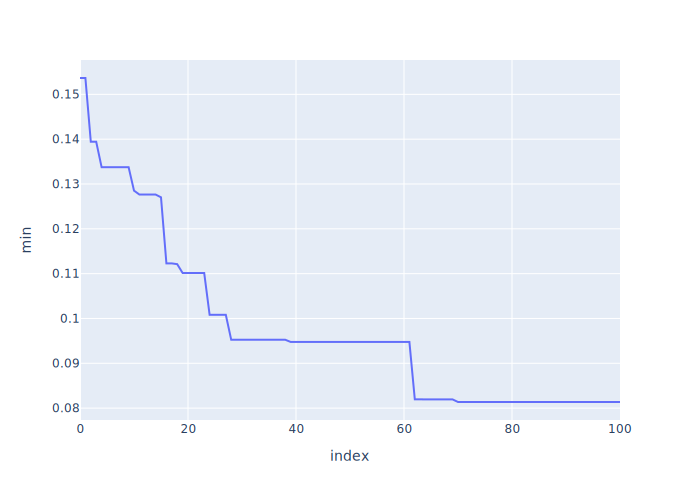

In [14]:
logs_df = pd.DataFrame(egp.log)
fig = px.line(logs_df,y='min')
fig.show('svg')

## Accessing Solutions

### Access an individual by index straight from the population array

In [15]:
egp.pop[1]

<class 'deap.creator.Individual'>[
	<class 'geppy.core.entity.Gene'> [sub, mul, x, protected_div, -33316.49825326827, x, x, x, -457379.5787754619, -28179.368519282663, x, 500932.86421191046, 85502.58076934019, -240864.3372198445, x],
	<class 'geppy.core.entity.Gene'> [sub, mul, add, protected_div, protected_div, x, x, x, 415624.68024210335, x, -387102.87968391756, x, x, x, -705350.888849024]
], linker=<built-in function add>

### Get an individual simplified/symbolic description according to its index on population array

In [16]:
# symbolic representation for the individual in the Nth position of population array
n = 0
egp.get_individual_simplified(n)

x*(x*(4.49399718746757e-6*x - 1.86781614405012)*(x - 95799.5583107693) - 1041970.55966413)/(x - 95799.5583107693)

### Access best indivdual (solution) from population array

In [17]:
egp.best_individual

<class 'deap.creator.Individual'>[
	<class 'geppy.core.entity.Gene'> [protected_div, mul, add, -520985.2798320651, add, x, -95799.55831076927, x, x, x, 12540.634111911433, x, x, 148980.97992460613, x],
	<class 'geppy.core.entity.Gene'> [protected_div, sub, protected_div, mul, mul, -222519.05336939316, x, x, 415624.68024210335, x, x, x, x, x, -705350.888849024]
], linker=<built-in function add>

### Get best individual simplified/symbolic description

In [18]:
egp.get_best_solution_simplified()

x*(x*(4.49399718746757e-6*x - 1.86781614405012)*(x - 95799.5583107693) - 1041970.55966413)/(x - 95799.5583107693)

## Making predictions

### Get the solution as a Python function (Geppy converts the individual to a lambda function)

In [19]:
best_func = egp.get_best_solution_as_function()
best_func

<function easy_geppy.easy_geppy.EasyGeppy.get_individual_solver_as_func.<locals>.solver(df)>

### Attaching predictions to dataframe

In [20]:
df['y_predicted'] = best_func(df)
df

,x,y,y1,y2,y3,y4,y_predicted
0,1.604939,4.809281,2.741134,4.693335,3.185793,-131.973785,12.645365
1,-1.365814,-15.669463,-18.241109,-9.341193,-21.341389,-78.687996,-18.339487
2,5.557423,30.123185,30.853157,24.241757,66.233854,70.430088,2.762567
3,2.971587,37.314142,35.659354,30.455177,12.745712,55.549218,15.828362
4,8.037806,-45.093919,-44.088831,-40.191495,-89.885644,-102.569150,-33.239311
...,...,...,...,...,...,...,...
95,-1.911558,-16.364691,-13.702425,-18.970313,-5.882917,-59.513440,-27.615918
96,2.438468,22.382039,24.922354,17.973541,2.207494,46.442033,15.416637
97,9.542923,-66.645873,-64.231345,-40.829297,-82.387665,-81.787584,-66.288604
98,7.573717,-15.981069,-32.686730,-7.443209,-17.581667,23.210885,-24.755624


### Checking sample

In [21]:
df.describe()

,x,y,y1,y2,y3,y4,y_predicted
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.125189,-56.518867,-56.146227,-58.457125,-54.990372,-58.698553,-65.390913
std,5.883269,86.636797,87.037754,85.195816,87.257783,104.362611,82.473283
min,-9.702232,-278.579016,-292.164357,-290.304129,-299.454635,-346.293167,-281.344129
25%,-5.323560,-89.465319,-89.868408,-83.544098,-92.403156,-111.794856,-110.834444
50%,-0.557699,-32.908802,-34.427170,-36.278654,-33.544418,-48.448932,-35.828301
75%,4.163465,6.215674,10.330640,4.575293,3.824181,14.845266,-2.085673
max,9.991331,50.142720,49.027569,40.535134,67.813628,188.159779,15.828362


## Plotting results

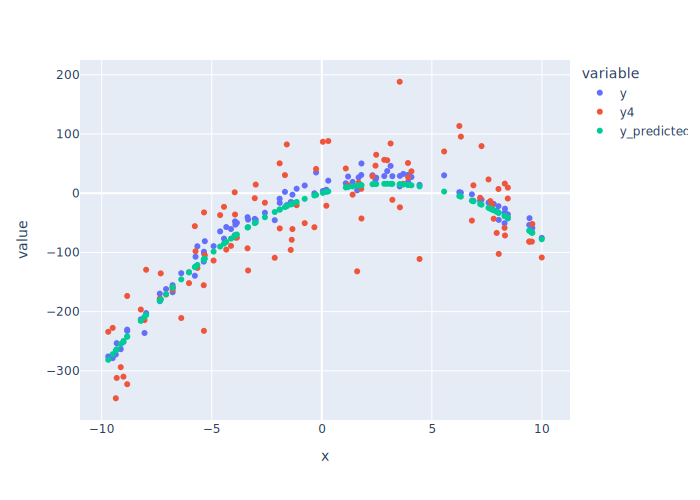

In [22]:
fig = px.scatter(df,x='x', y=['y',y_column,'y_predicted'])
fig.show('svg')

## Visualization: Expression Tree as a diagram

In [23]:
import geppy as gep

 # we want use symbol labels instead of words in the tree graph
rename_labels = {'add': '+', 'sub': '-', 'mul': '*', 'protected_div': '/'}  
gep.export_expression_tree(egp.best_individual, rename_labels, 'data/numerical_expression_tree.png')



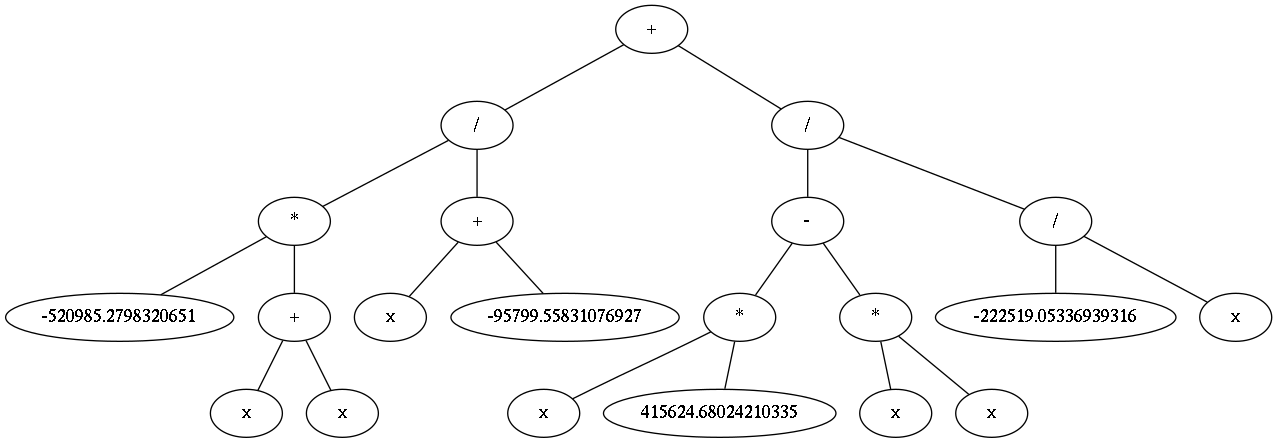

In [24]:
# show the above image here for convenience
from IPython.display import Image
Image(filename='data/numerical_expression_tree.png') 

## Train from a saved checkpoint

### As long as you have the previous SimpleGeppy object in memory
### you can start from where you stoped by calling launch_evolution again

In [25]:
egp.launch_evolution(n_pop=300, n_gen=100)

gen	nevals	size	avg        	std        	min      	max        
0  	0     	100 	3.85772e+06	1.91346e+07	0.0813626	1.42742e+08
1  	99    	100 	1.76193e+09	1.69014e+10	0.0813626	1.69819e+11
2  	99    	100 	3.03545e+06	2.51207e+07	0.0813626	2.46534e+08
3  	99    	100 	1.98154e+06	1.73723e+07	0.0813626	1.73045e+08
4  	99    	100 	5.19965e+08	5.05797e+09	0.0813626	5.08425e+10
5  	99    	100 	1.54318e+07	7.69092e+07	0.0813626	5.98596e+08
6  	99    	100 	6.81238e+06	3.76705e+07	0.0813626	2.96519e+08
7  	99    	100 	2.26522e+07	9.24e+07   	0.0813626	5.05353e+08
8  	99    	100 	3.76937e+06	2.27516e+07	0.0813626	1.73045e+08
9  	99    	100 	1.28048e+17	1.27406e+18	0.0813626	1.28048e+19
10 	99    	100 	4.43815e+07	2.50563e+08	0.0813626	2.17155e+09
11 	99    	100 	1.92437e+12	1.9147e+13 	0.0813626	1.92435e+14
12 	99    	100 	933564     	7.73332e+06	0.0813626	7.5981e+07 
13 	99    	100 	1.36508e+12	1.35821e+13	0.0813626	1.36505e+14
14 	99    	100 	2.26609e+07	2.25462e+08	0.0813626	2.26598e+09
15 	99  

### The log variable gets restarted everytime you launch evolution

In [26]:
egp.log[:5]

[{'gen': 0,
  'nevals': 0,
  'size': 100,
  'avg': 3857718.1880696164,
  'std': 19134583.927610487,
  'min': 0.08136261812840372,
  'max': 142741654.5496926},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 1761930711.0724027,
  'std': 16901442434.99201,
  'min': 0.08136261812840372,
  'max': 169818669339.58212},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 3035449.3878257936,
  'std': 25120743.445736162,
  'min': 0.08136261812840372,
  'max': 246533892.23720554},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 1981538.506843275,
  'std': 17372278.460930966,
  'min': 0.08136261812840372,
  'max': 173045000.89492232},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 519964906.0528128,
  'std': 5057974783.669321,
  'min': 0.08136261812840372,
  'max': 50842460029.000244}]

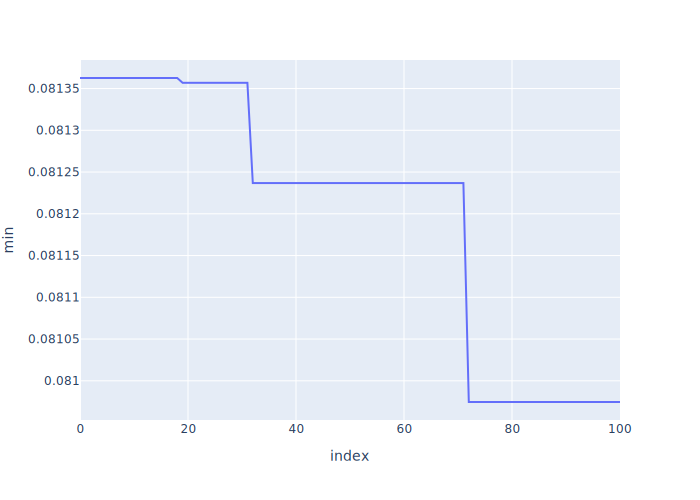

In [27]:
logs_df = pd.DataFrame(egp.log)
fig = px.line(logs_df,y='min')
fig.show('svg')

### But the logs variable keeps the story as a list of list for each execution

In [28]:
egp.logs[0][:5]

[{'gen': 0,
  'nevals': 100,
  'size': 100,
  'avg': 338095788967.6862,
  'std': 2317069647412.9863,
  'min': 0.15364673698061693,
  'max': 20227777479065.73},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 2638065.396643224,
  'std': 17573859.061342373,
  'min': 0.15364673698061693,
  'max': 148704507.63422805},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 1343563074626.283,
  'std': 13368273354540.416,
  'min': 0.1394270046474838,
  'max': 134356203510348.12},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 215644.26897250852,
  'std': 2144817.458924285,
  'min': 0.1394270046474838,
  'max': 21556308.35720008},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 14171240.26490262,
  'std': 88664522.26218484,
  'min': 0.13375257592454567,
  'max': 766933965.0556519}]

In [29]:
egp.logs[1][:5]

[{'gen': 0,
  'nevals': 0,
  'size': 100,
  'avg': 3857718.1880696164,
  'std': 19134583.927610487,
  'min': 0.08136261812840372,
  'max': 142741654.5496926},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 1761930711.0724027,
  'std': 16901442434.99201,
  'min': 0.08136261812840372,
  'max': 169818669339.58212},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 3035449.3878257936,
  'std': 25120743.445736162,
  'min': 0.08136261812840372,
  'max': 246533892.23720554},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 1981538.506843275,
  'std': 17372278.460930966,
  'min': 0.08136261812840372,
  'max': 173045000.89492232},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 519964906.0528128,
  'std': 5057974783.669321,
  'min': 0.08136261812840372,
  'max': 50842460029.000244}]

### You must clean it by using clan_logs() function

In [30]:
egp.clean_logs()
egp.logs

[]

### Get and use new results

In [31]:
best_func = egp.get_best_solution_as_function()
best_func

<function easy_geppy.easy_geppy.EasyGeppy.get_individual_solver_as_func.<locals>.solver(df)>

In [32]:
df['y_predicted'] = best_func(df)
df

,x,y,y1,y2,y3,y4,y_predicted
0,1.604939,4.809281,2.741134,4.693335,3.185793,-131.973785,13.915822
1,-1.365814,-15.669463,-18.241109,-9.341193,-21.341389,-78.687996,-19.421120
2,5.557423,30.123185,30.853157,24.241757,66.233854,70.430088,7.158579
3,2.971587,37.314142,35.659354,30.455177,12.745712,55.549218,18.180103
4,8.037806,-45.093919,-44.088831,-40.191495,-89.885644,-102.569150,-26.884757
...,...,...,...,...,...,...,...
95,-1.911558,-16.364691,-13.702425,-18.970313,-5.882917,-59.513440,-29.129847
96,2.438468,22.382039,24.922354,17.973541,2.207494,46.442033,17.346642
97,9.542923,-66.645873,-64.231345,-40.829297,-82.387665,-81.787584,-58.746896
98,7.573717,-15.981069,-32.686730,-7.443209,-17.581667,23.210885,-18.767326


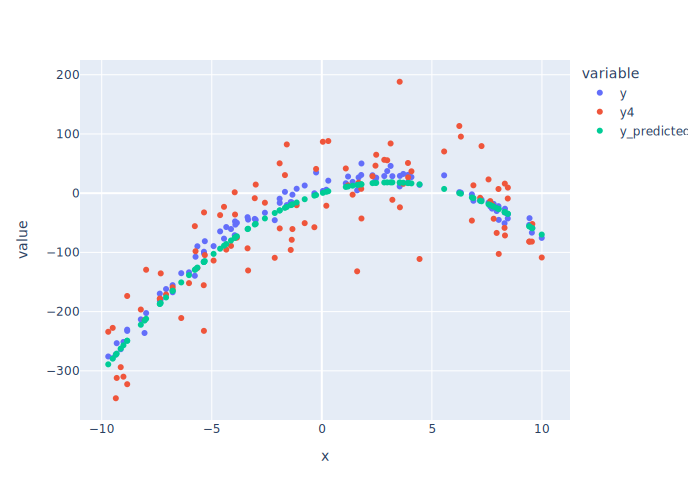

In [33]:
fig = px.scatter(df,x='x', y=['y',y_column,'y_predicted'])
fig.show('svg')

In [34]:
egp.get_best_solution_simplified()

x*(11.6683556714632 - 1.86781614405012*x)